# Задание:  


<b>Данные. Выполнить первичную обработку данных. Сделать первые выводы.</b>

1) Рассмотрите данные и вычислите основные характеристики признаков: среднее, стандартное отклонение, медиана, квартили.  Постройте гистограммы признаков и блок-диаграммы признаков. Сделайте первые выводы о возможном распределении признаков.
2) В данных есть пропуски. Подберите из литературы метод восстановления пропущенных данных и заполните пропуски по этому методу.
3) В данных возможны выбросы. Подберите из литературы метод определения выбросов и удалите объекты, идентифицированные как выбросы по этому методу.

<b>Снижение размерности. Метод PCA</b> (Principal Component Analysis=метод главных компонент).

4) Выполнить центрирование данных и такую нормировку, что евклидова норма каждого признака равна 1 (полученная матрица обозначается через Z).
5) Найти SVD разложение матрицы Z (матрицы U, S, V).
6) Исследуйте, сколько скрытых факторов (главные факторы) достаточно для хорошей аппроксимации матрицы данных Z. Замените значения исходных признаков линейными комбинациями главных факторов (матрица Zk, k – число главных факторов). Вычислите погрешность аппроксимации в спектральной матричной  норме и норме Фробениуса.
7) Используя выделенные главные факторы, найти представления клиентов векторами меньшей размерности (размерности k) и построить карту клиентов. Сделать выводы о клиентах банка.

<b>Снижение размерности. Интерпретация скрытых факторов.</b>

8) Выписать матрицу коэффициентов разложения признаков zj по главным факторам. Исследовать структуру этой матрицы с целью выделения групп признаков тесно связанных с каждым из главных факторов.
9) На основе анализа структуры матрицы коэффициентов разложения, предложить интерпретацию выделенным главным факторам. Дать интерпретацию построенной выше карте клиентов.

<b>Снижение размерности. Метод MDS</b> (Multidimensional Scaling = многомерное шкалирование).

10) Предложите способ вычисления расстояния между клиентами и вычислите матрицу расстояний.
11) Проверьте, можно ли клиентов банка поместить в евклидово пространство размерности 2 с сохранением расстояний между клиентами.
12) Используйте любой из алгоритмов MDS для размещения объектов в евклидовом пространстве размерности 2. Оцените погрешность такого размещения. Постройте карту клиентов. Сравните с картой клиентов из п.7 и сделайте выводы. 

# Настройки/Гиперпараметры/Импорты

In [48]:
import pandas as pd # для удобной работы с датасетом
import matplotlib.pyplot as plt # для построения графиков

In [5]:
# import sys
# !{sys.executable} -m pip install xlrd

# Данные. Выполнить первичную обработку данных. Сделать первые выводы.

### 1) Рассмотрите данные и вычислите основные характеристики признаков: среднее, стандартное отклонение, медиана, квартили.  Постройте гистограммы признаков и блок диаграммы  признаков. Сделайте первые выводы о возможном распределении признаков.

In [7]:
data = pd.read_excel("./23MAG_HW_1_v7.xls", header=None, names=["Возраст (лет)", "Количество иждивенцев", "Доход (руб./мес.)", "Срок проживания в регионе (лет)", "Оценка автомобиля заемщика (USD)", "Размер кредита (тыс. руб.)"]) # считывание данных (header=None и указаны names, так как файл не содержит названия колонок)
data

,Возраст (лет),Количество иждивенцев,Доход (руб./мес.),Срок проживания в регионе (лет),Оценка автомобиля заемщика (USD),Размер кредита (тыс. руб.)
0,54.0,3.0,16700.0,18.0,18000.0,177000.0
1,36.0,2.0,33800.0,NaN,34000.0,337000.0
2,NaN,1.0,12900.0,9.0,12000.0,126000.0
3,44.0,2.0,17700.0,13.0,18000.0,180000.0
4,54.0,4.0,20000.0,19.0,22000.0,211000.0
5,41.0,NaN,11900.0,11.0,12000.0,119000.0
6,31.0,1.0,22700.0,4.0,22000.0,221000.0
7,28.0,1.0,NaN,2.0,30000.0,300000.0
8,45.0,2.0,12600.0,13.0,13000.0,128000.0
9,25.0,1.0,31900.0,0.0,30000.0,NaN


#### Вычисление основных характеристик (с пропуском NaN значений).

        Среднее значение:

In [10]:
data.mean() # вывод среднего значения по колонкам (NaN пропускаются)

Возраст (лет)                           39.081633
Количество иждивенцев                    2.000000
Доход (руб./мес.)                    19432.653061
Срок проживания в регионе (лет)         10.224490
Оценка автомобиля заемщика (USD)     20959.183673
Размер кредита (тыс. руб.)          198448.979592
dtype: float64

        Стандартное отклонение:

Стандартное отклонение — показатель рассеивания значений случайной величины относительно её математического ожидания (считается, как корень из дисперсии).

In [36]:
data.std(ddof=0) # вывод стандартного отклонения (standard deviation) по колонкам (NaN пропускаются, делим на N сэмплов, а не N-1)

Возраст (лет)                           8.854462
Количество иждивенцев                   0.979796
Доход (руб./мес.)                    9965.233191
Срок проживания в регионе (лет)         4.866652
Оценка автомобиля заемщика (USD)    11362.234588
Размер кредита (тыс. руб.)          98697.861198
dtype: float64

        Медиана:

Медиана — такое число, что половина из элементов выборки больше него, а другая половина меньше.

In [12]:
data.median() # вывод медианы по колонкам (NaN пропускаются)

Возраст (лет)                           40.0
Количество иждивенцев                    2.0
Доход (руб./мес.)                    16800.0
Срок проживания в регионе (лет)         11.0
Оценка автомобиля заемщика (USD)     19000.0
Размер кредита (тыс. руб.)          186000.0
dtype: float64

        Квартили:

Квартили (особый вид квантилей — значений признака, которые делят упорядоченные данные на некоторое число равных частей) == перцентили 25%, 50% (медиана), 75%.

In [76]:
data.quantile([0.25, 0.5, 0.75])

,Возраст (лет),Количество иждивенцев,Доход (руб./мес.),Срок проживания в регионе (лет),Оценка автомобиля заемщика (USD),Размер кредита (тыс. руб.)
0.25,33.0,1.25,12100.0,7.0,13000.0,126000.0
0.50,40.0,2.00,16800.0,11.0,19000.0,186000.0
0.75,46.0,3.00,28700.0,14.0,30000.0,293000.0


#### Графики распределений признаков.

        Гистограмма:

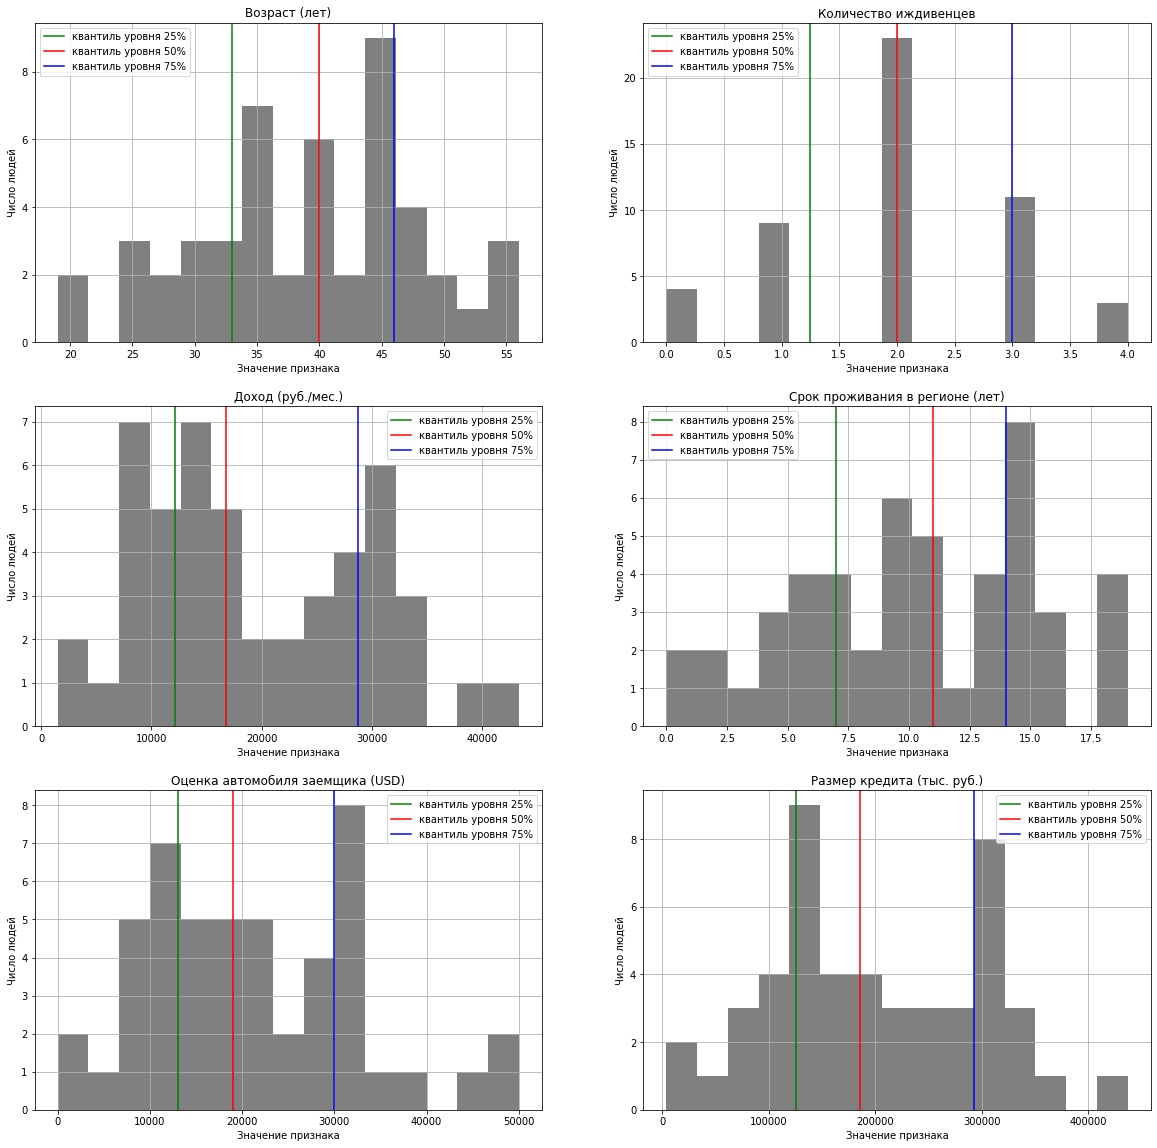

In [115]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 20)) # основные настройки выводимых графиков (nrows-число строк, ncols-число столбцов, figsize-размер выводимой фигуры)
# fig - выводимая фигура, axes - оси в этой фигуре (под каждый график)

quantiles = ['25%','50%', '75%'] # квартили
colors = ['green', 'red', 'blue'] # цвета для квартилей

for col, ax in zip(data.columns, axes.flat): 
# zip - объединяем колонки (название признака) и соответствующие подграфики, чтобы удобно по ним итерироваться
# axes.flat рассматривает axes как одномерный массив (A 1-D iterator over the array)

    ax.set_title(col) # добавление заголовка каждому графику
    ax.grid() # добавление сетки на графики
    ax.hist(x=data[col], bins=15, color="grey") # построение гистограммы (bins - число столбцов)
    ax.set_xlabel('Значение признака') # подпись под осью x
    ax.set_ylabel('Число людей') # подпись под осью y
    
    for i in range(len(quantiles)):
        ax.axvline(data[col].describe()[quantiles[i]], color=colors[i]) # добавление линии-квартиля
    ax.legend(["квантиль уровня 25%", "квантиль уровня 50%", "квантиль уровня 75%"]) # добавление подписи квартилей
plt.show() # вывод графиков

        Ящик с усами:

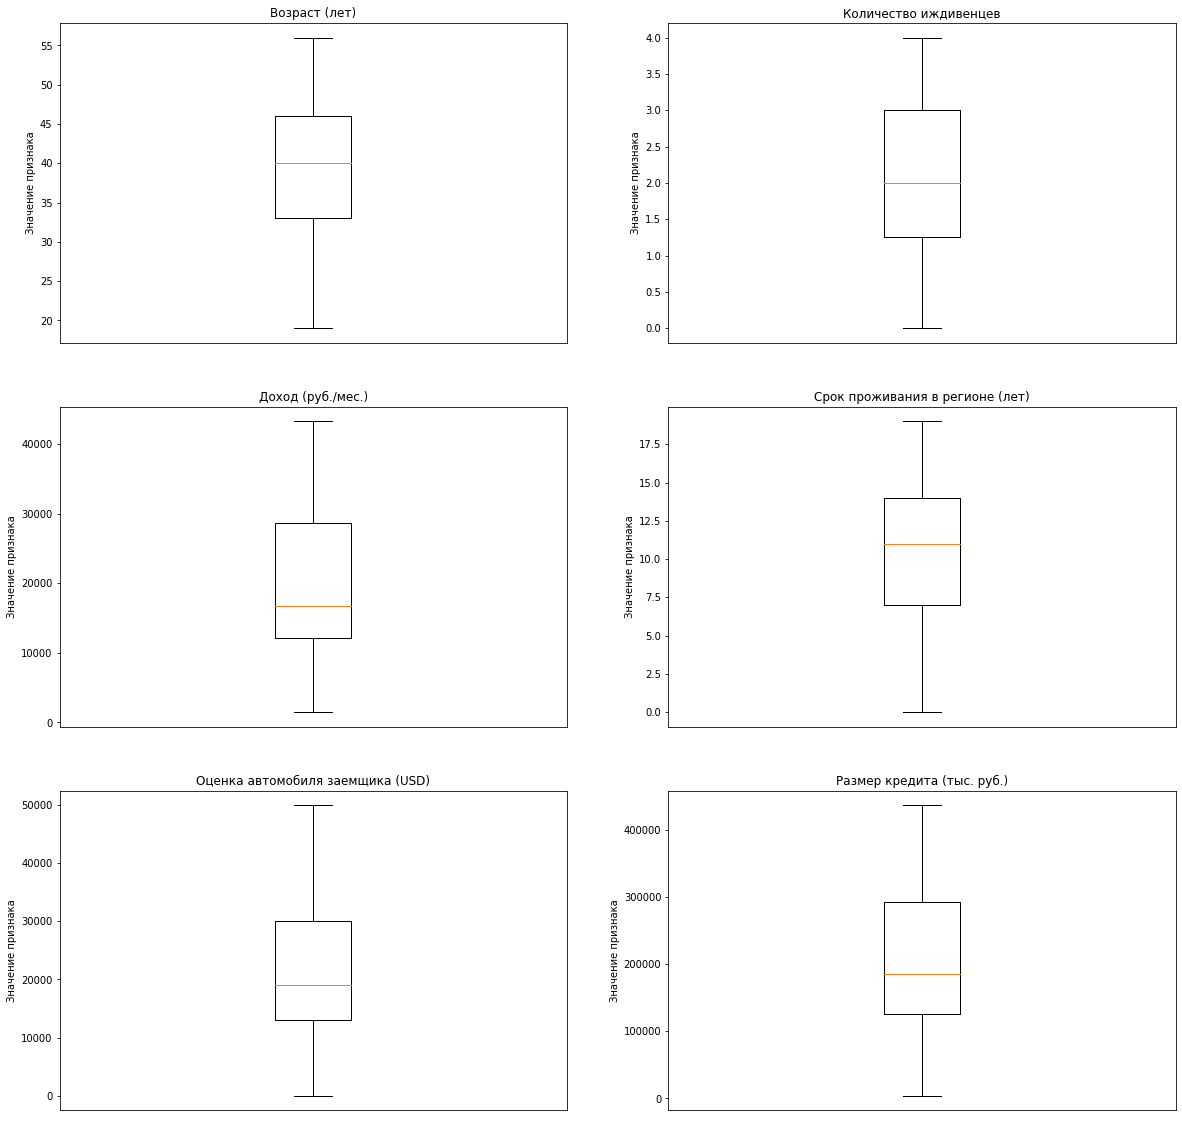

In [129]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 20)) # основные настройки выводимых графиков (nrows-число строк, ncols-число столбцов, figsize-размер выводимой фигуры)

for col, ax in zip(data.columns, axes.flat): 
# zip - объединяем колонки (название признака) и соответствующие подграфики, чтобы удобно по ним итерироваться
# axes.flat рассматривает axes как одномерный массив (A 1-D iterator over the array)

    ax.set_title(col) # добавление заголовка каждому графику
    ax.boxplot(x=data[col].dropna())
    ax.set_ylabel('Значение признака') # подпись под осью y
    ax.set_xticks(ticks=[]) # убирание подписи под осью x
plt.show() # вывод графиков

Центром ящика является медиана. Краями ящика являются 1-й и 3-й квартили. Усами ящика принято брать по 1,5 межквартильных размаха (межквартильный размах составляет разницу между третьим и первым квартилем) в каждую сторону. Все, что выходит за границы полутора межквартильных размахов является выбросом. Если данных, заходящих за границы усов нет — этими границами становятся максимальное и минимальное встреченные значения. 

Ширина ящика отражает вариативность 50% показателей исследуемого признака. Длина же усов показывает весь разброс показателей в выборке и наличие выбросов.
(https://vk.com/@hsotalks-zachem-yaschiku-usy-kvartili-raspredeleniya)

### 2) В данных есть пропуски. Подберите из литературы метод восстановления пропущенных данных и заполните пропуски по этому методу.

### 3) В данных возможны выбросы. Подберите из литературы метод определения выбросов и удалите объекты, идентифицированные как выбросы по этому методу.

# Снижение размерности. Метод PCA (Principal Component Analysis=метод главных компонент).